## Decision Tree Mini Project

In this project, we will again try to classify emails, this time using a decision tree.   The starter code is in decision_tree/dt_author_id.py.

---

## Part 1: Get the Decision Tree Running
Get the decision tree up and running as a classifier, setting min_samples_split=40.  What’s the accuracy?

---

### Libraries

In [1]:
#Specify external dir
import sys
sys.path.append("../tools/")

#Import preprocess for email data and visualization
from class_vis import prettyPicture
from email_preprocess import preprocess

In [2]:
#Import Dependencies
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

### Data

In [3]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


#### Create SVC Classifier

In [4]:
### Import module to create SVC classifier
from sklearn import tree

#### Create the model
clf = tree.DecisionTreeClassifier(min_samples_split=40)

#### Train

In [5]:
### Fit the classifier on the training features and labels
t0=time()
clf.fit(features_train,labels_train)
print("Training time: ",round(time()-t0,3),"secs")

Training time:  199.034 secs


#### Predict

In [6]:
### use the trained classifier to predict labels for the test features
### use the trained classifier to predict labels for the test features
t1=time()
pred=clf.predict(features_test)
print("Prediction time: ",round(time()-t1,3),"secs")

Prediction time:  0.022 secs


#### Visualize

In [7]:
target_names = ['Sara', 'Chris']

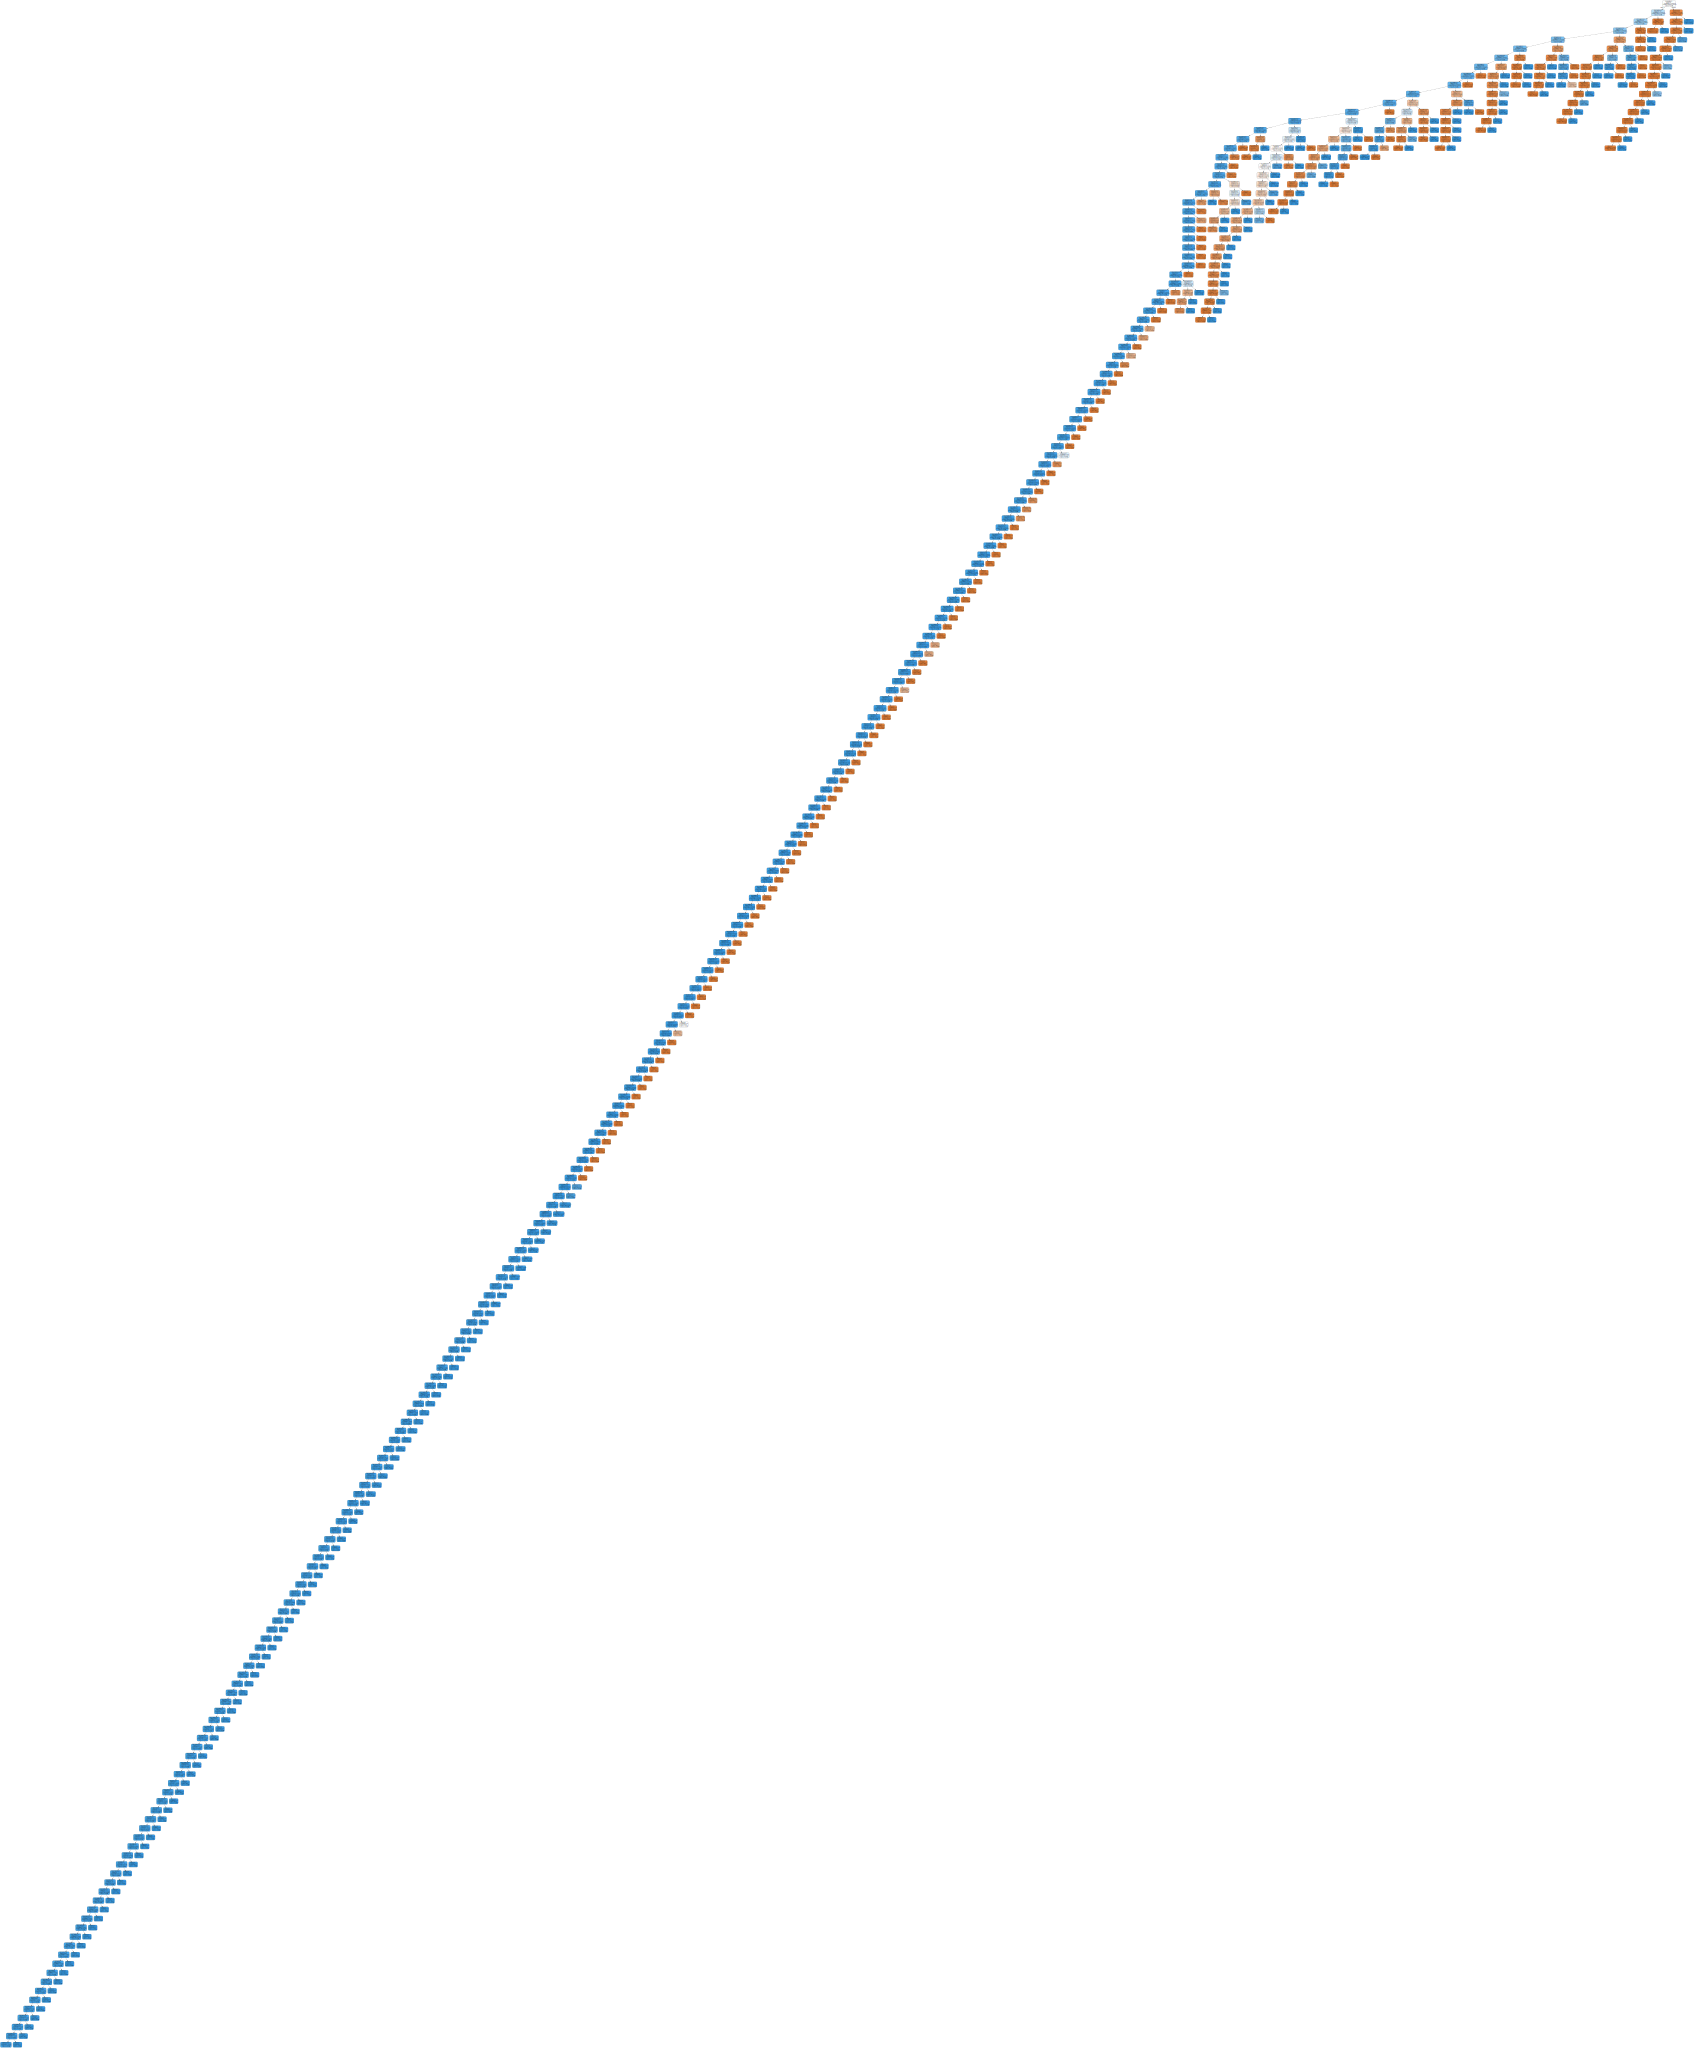

In [8]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    #feature_names=authors,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

In [10]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)

In [11]:
graph2.write_png('emails.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.951064 to fit



True

#### Model Accuracy

In [8]:
#Get accuracy for the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
print("Accuracy: {:.2f}%".format(accuracy *100))

Accuracy: 97.78%


## Part 2: Speed It Up
You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm.  A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly. 


Another way to control the complexity of an algorithm is via the number of features that you use in training/testing.  The more features the algorithm has available, the more potential there is for a complex fit.  We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

* find the number of features in your data.  The data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like len(features_train[0])
* go into tools/email_preprocess.py, and find the line of code that looks like this:     selector = SelectPercentile(f_classif, percentile=1)  Change percentile from 10 to 1.
* What’s the number of features now?
* What do you think SelectPercentile is doing?  Would a large value for percentile lead to a more complex or less complex decision tree, all other things being equal?
* Note the difference in training time depending on the number of features.  
* What’s the accuracy when percentile = 1?


#### Data Info

In [4]:
number_features = features_train.shape[1]
print("Number of features on the dataset: {}".format(number_features))

Number of features on the dataset: 379


#### Changing the Number of Features
go into ../tools/email_preprocess.py, and find the line of code that looks like this:

selector = SelectPercentile(f_classif, percentile=10)

Change percentile from 10 to 1, and rerun dt_author_id.py. What’s the number of features now?

In [5]:
number_features_afterChange = features_train.shape[1]
print("Number of features on the dataset: {}".format(number_features_afterChange))

Number of features on the dataset: 379


#### Model Accuracy

In [6]:
### Import module to create SVC classifier
from sklearn import tree

#### Create the model
clf_1percent = tree.DecisionTreeClassifier(min_samples_split=40)
clf_1percent.fit(features_train,labels_train)
pred_1percent=clf_1percent.predict(features_test)

In [8]:
#Get accuracy for the model
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(pred_1percent, labels_test)
print("Accuracy: {:.2f}%".format(accuracy1 *100))

Accuracy: 96.64%
